## CSE 6367 Programming Assignment 4 (P4)
## Fall 2023
## Panorama

## Dataset

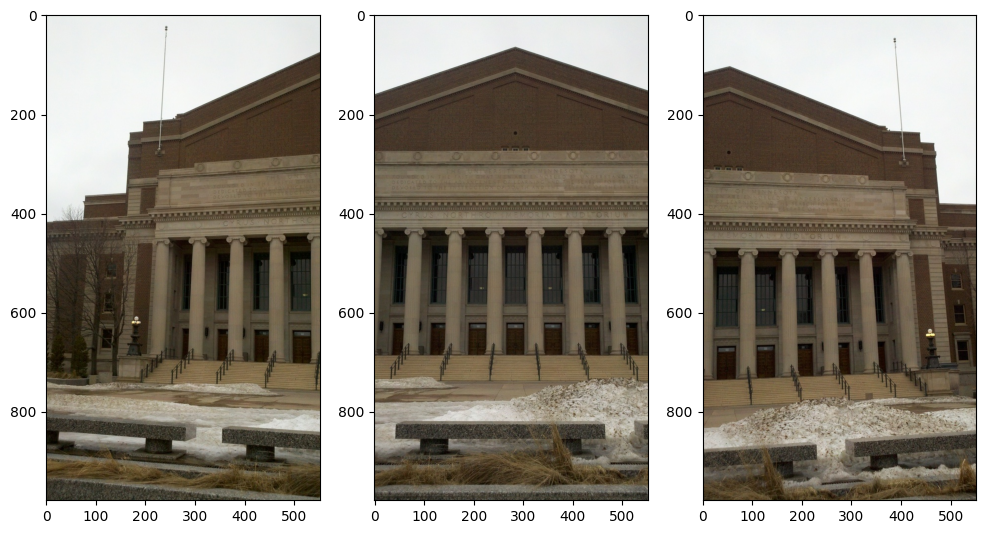

In [2]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/mall1.jpg")
img2 = cv2.imread("Images/mall2.jpg")
img3 = cv2.imread("Images/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

In [6]:
import cv2
import numpy as np

# Function to initialize the SIFT feature detector
def initialize_feature_detector():
    return cv2.SIFT_create()

# Function to detect keypoints
def detect_keypoints(image, feature_detector):
    keypoints = feature_detector.detect(image, None)
    return keypoints

# Function to compute descriptors
def compute_descriptors(image, keypoints, feature_detector):
    _, descriptors = feature_detector.compute(image, keypoints)
    return descriptors

# Function to create a matcher
def create_matcher():
    return cv2.BFMatcher(cv2.NORM_L2)

# Function to match descriptors using a while loop
def match_descriptors(matcher, des1, des2, threshold=0.7):
    matches = matcher.knnMatch(des1, des2, k=2)
    good_matches = []
    i = 0
    while i < len(matches):
        if matches[i][0].distance < matches[i][1].distance * threshold:
            good_matches.append(matches[i][0])
        i += 1
    return good_matches

# Function to convert keypoints to points
def keypoints_to_points(keypoints, matches, query=True):
    points = []
    i = 0
    while i < len(matches):
        idx = matches[i].queryIdx if query else matches[i].trainIdx
        points.append(keypoints[idx].pt)
        i += 1
    return np.float32(points)

# Function to estimate the homography matrix
def estimate_homography(points1, points2):
    H, _ = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
    return H

# Function to warp one image to another
def warp_images(img1, img2, H):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    result = cv2.warpPerspective(img1, H, (w1 + w2, h1))
    result[0:h2, 0:w2] = img2
    return result

# Example usage
sift = initialize_feature_detector()
matcher = create_matcher()

img1 = cv2.imread('Images/mall1.jpg')
img2 = cv2.imread('Images/mall2.jpg')

kp1 = detect_keypoints(img1, sift)
kp2 = detect_keypoints(img2, sift)

des1 = compute_descriptors(img1, kp1, sift)
des2 = compute_descriptors(img2, kp2, sift)

matches = match_descriptors(matcher, des1, des2)

points1 = keypoints_to_points(kp1, matches, query=True)
points2 = keypoints_to_points(kp2, matches, query=False)

H = estimate_homography(points1, points2)

result_img = warp_images(img1, img2, H)


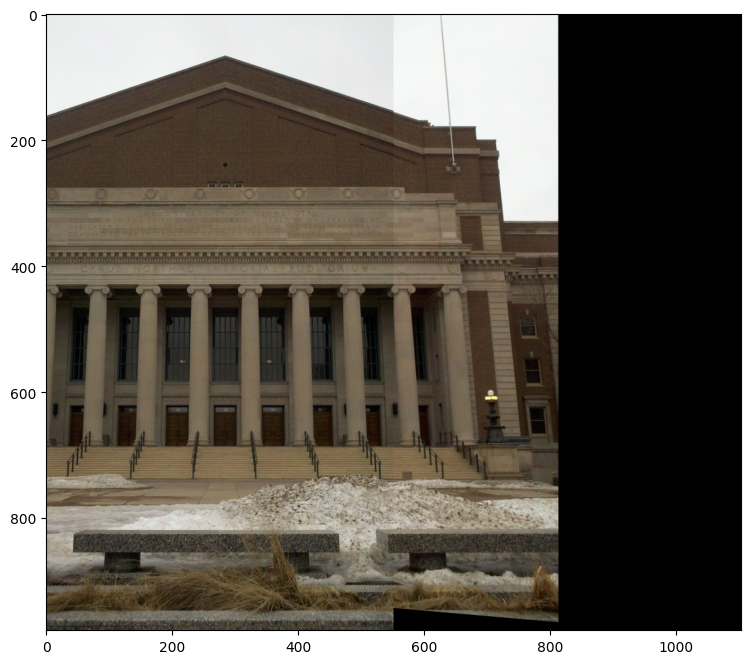

In [7]:
import cv2
import matplotlib.pyplot as plt

# Assuming the functions defined earlier are available in the same script

# Loading images
img2 = cv2.imread('Images/mall2.jpg')  # Replace with actual path
img3 = cv2.imread('Images/mall3.jpg')  # Replace with actual path

# Initialize the feature detector and matcher
sift = initialize_feature_detector()
matcher = create_matcher()

# Detect keypoints and compute descriptors for img3 and img2
img3_kp = detect_keypoints(img3, sift)
img3_des = compute_descriptors(img3, img3_kp, sift)

img2_kp = detect_keypoints(img2, sift)
img2_des = compute_descriptors(img2, img2_kp, sift)

# Match descriptors
matches = match_descriptors(matcher, img3_des, img2_des)

# Convert keypoints to points for homography estimation
img3_pts = keypoints_to_points(img3_kp, matches, query=True)
img2_pts = keypoints_to_points(img2_kp, matches, query=False)

# Estimate homography matrix
H_32 = estimate_homography(img3_pts, img2_pts)

# Warp img3 to img2
result_32 = warp_images(img3, img2, H_32)

# Display the stitched image
plt.imshow(cv2.cvtColor(result_32, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.show()


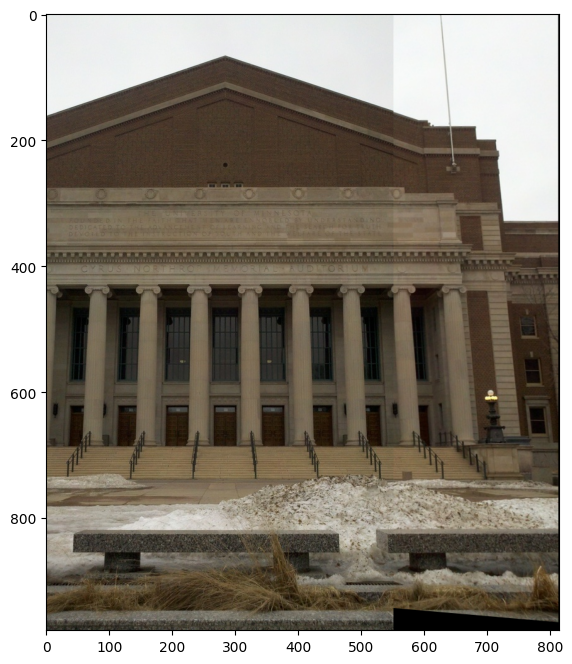

In [11]:
import cv2
import matplotlib.pyplot as plt
import imutils



# Convert the stitched panorama image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to the grayscale image
def apply_threshold(gray_image, lower_bound, upper_bound):
    return cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)[1]

# Find contours in a binary image
def find_contours(binary_image):
    contours = cv2.findContours(binary_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return imutils.grab_contours(contours)

# Calculate bounding rectangle for the largest contour
def bounding_rect_for_largest_contour(contours):
    largest_contour = max(contours, key=cv2.contourArea)
    return cv2.boundingRect(largest_contour)

# Crop the image based on the bounding rectangle
def crop_image_to_bounding_rect(image, bounding_rect):
    x, y, w, h = bounding_rect
    return image[y:y + h, x:x + w]

# Applying the functions
gray_image = convert_to_grayscale(result_32)
thresholded_image = apply_threshold(gray_image, 0, 255)
contours = find_contours(thresholded_image)
bounding_rect = bounding_rect_for_largest_contour(contours)
cropped_image = crop_image_to_bounding_rect(result_32, bounding_rect)

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.show()


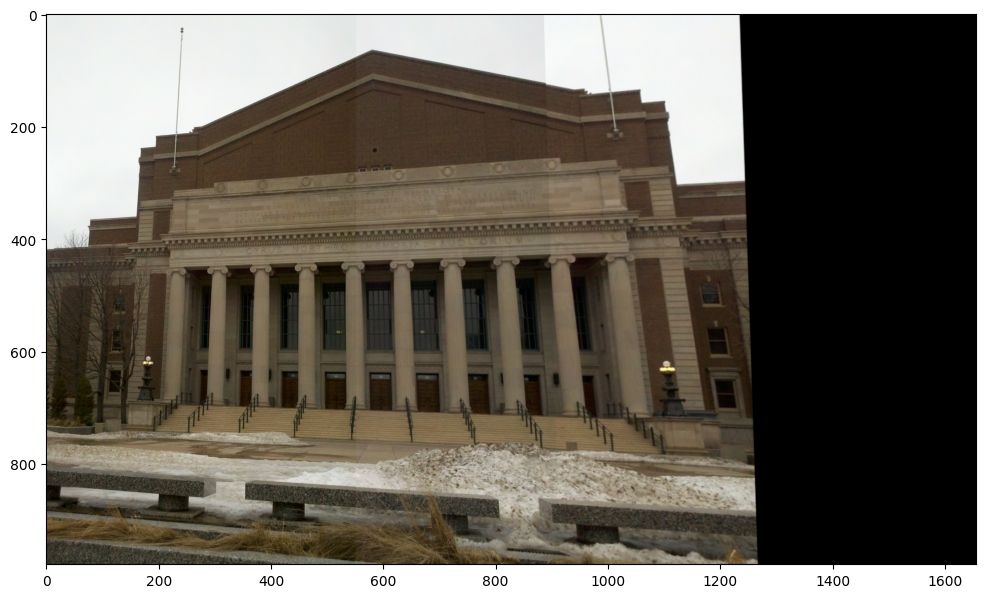

In [14]:
b
# Detect keypoints for result_32 and img1
result_32_kp = detect_keypoints(result_32, sift)
img1_kp = detect_keypoints(img1, sift)

# Compute descriptors for result_32 and img1
result_32_des = compute_descriptors(result_32, result_32_kp, sift)
img1_des = compute_descriptors(img1, img1_kp, sift)

# Match descriptors
matches = match_descriptors(matcher, result_32_des, img1_des)

# Convert keypoints to points for homography estimation
result_32_pts = keypoints_to_points(result_32_kp, matches, query=True)
img1_pts = keypoints_to_points(img1_kp, matches, query=False)

# Estimate homography matrix
H_21_3 = estimate_homography(result_32_pts, img1_pts)

# Warp result_32 to img1
result_32_3 = warp_images(result_32, img1, H_21_3)

# Display the stitched image
plt.imshow(cv2.cvtColor(result_32_3, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.show()


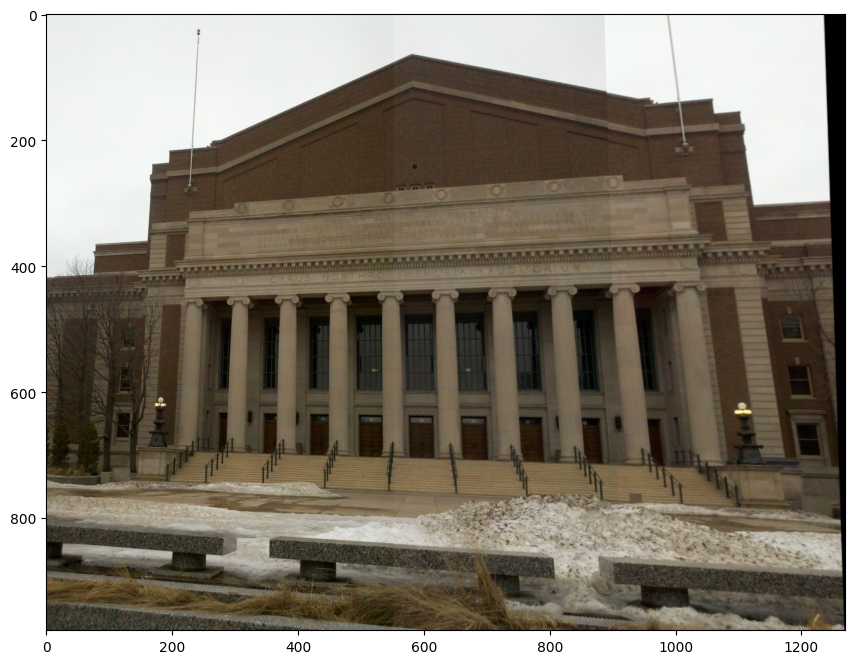

In [15]:
import cv2
import matplotlib.pyplot as plt
import imutils

# Function to convert image to grayscale
def to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Function to apply binary thresholding
def binary_threshold(image, lower_bound, upper_bound):
    return cv2.threshold(image, lower_bound, upper_bound, cv2.THRESH_BINARY)[1]

# Function to find the largest contour
def find_largest_contour(binary_image):
    contours = cv2.findContours(binary_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    return max(contours, key=cv2.contourArea)

# Function to get bounding box from a contour
def get_bounding_box(contour):
    return cv2.boundingRect(contour)

# Function to crop image based on bounding box
def crop_image(image, bounding_box):
    x, y, w, h = bounding_box
    return image[y:y+h, x:x+w]

# Convert the panorama image to grayscale and threshold it
gray_image = to_grayscale(result_32_3)
thresholded_image = binary_threshold(gray_image, 0, 255)

# Find the largest contour
largest_contour = find_largest_contour(thresholded_image)

# Get the bounding box of the largest contour
bounding_box = get_bounding_box(largest_contour)

# Crop the image to the bounding box coordinates
cropped_image = crop_image(result_32_3, bounding_box)

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.show()


## Assignment Instructions:

In this assignment, you will perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
<b> You may use opencv or other libraries for doing different tasks of this programming assignment.<\b>

### Submission Guidelines:
        
        Submit through Canvas your source code in a single .ipynb file. 
        The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)
        The images are available in the ./Images directory. Your TA will use the same directory name to grade your submission.
        You don't need to attach the images folder with your submission.